In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim  # Add this line to import optim
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import numpy as np

from torchvision import datasets, transforms

# Define data transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Download the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

# Create data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 148817396.19it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 121135693.82it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 77857110.33it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 24145156.87it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



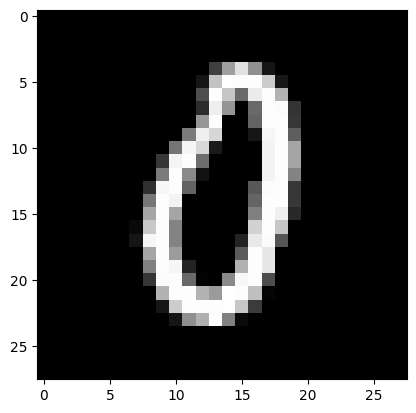

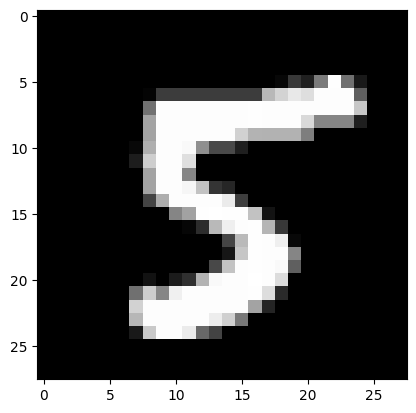

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize MNIST samples
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    plt.imshow(img.squeeze(), cmap='gray')
    plt.show()

# Get a batch of training data
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Visualize a few samples
imshow(images[0])
imshow(images[1])


In [ ]:
# Modify the model configurations to include different activation functions
class ShallowModel(nn.Module):
    def __init__(self, activation):
        super(ShallowModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 64)
        self.activation = activation
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.activation(x)  # Use the specified activation function
        x = self.fc2(x)
        return x

class MediumModel(nn.Module):
    def __init__(self, activation):
        super(MediumModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.activation = activation
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.activation(x)  # Use the specified activation function
        x = self.fc2(x)
        x = self.activation(x)  # Use the specified activation function
        x = self.fc3(x)
        return x

class DeepModel(nn.Module):
    def __init__(self, activation):
        super(DeepModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.activation = activation
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.activation(x)  # Use the specified activation function
        x = self.fc2(x)
        x = self.activation(x)  # Use the specified activation function
        x = self.fc3(x)
        x = self.activation(x)  # Use the specified activation function
        x = self.fc4(x)
        return x

In [ ]:
# Define activation functions
activation_functions = {
    "ReLU": nn.ReLU(),
    "Sigmoid": nn.Sigmoid(),
    "Tanh": nn.Tanh(),
}

# Define loss functions
loss_functions = {
    "Cross-Entropy Loss": nn.CrossEntropyLoss(),
    "Sparse Cross-Entropy Loss": nn.CrossEntropyLoss(),
    "Hinge Loss": nn.MultiMarginLoss(),
}

# Train and evaluate models with different activation functions and loss functions
results = {}

for activation_name, activation_function in activation_functions.items():
    for loss_name, loss_function in loss_functions.items():
        print(f"Training models with {activation_name} activation and {loss_name}")

        model_configs = {
            "Shallow Model": ShallowModel(activation_function),
            "Medium Model": MediumModel(activation_function),
            "Deep Model": DeepModel(activation_function),
        }

        model_results = {}  # Create a separate dictionary for each activation-loss combination

        for model_name, model in model_configs.items():
            optimizer = optim.Adam(model.parameters(), lr=0.001)
            num_epochs = 10  # Set the number of epochs as needed

            # Training loop
            for epoch in range(num_epochs):
                running_loss = 0.0
                correct_predictions = 0
                total_predictions = 0

                for i, data in enumerate(train_loader, 0):
                    inputs, labels = data

                    optimizer.zero_grad()

                    outputs = model(inputs)
                    loss = loss_function(outputs, labels)
                    loss.backward()
                    optimizer.step()

                    running_loss += loss.item()

                    _, predicted = torch.max(outputs, 1)
                    total_predictions += labels.size(0)
                    correct_predictions += (predicted == labels).sum().item()

                # Calculate accuracy
                accuracy = (correct_predictions / total_predictions) * 100

                print(f"Epoch {epoch + 1}, Activation ({activation_name}), Loss ({loss_name}), Model ({model_name}): {running_loss / len(train_loader)}, Accuracy: {accuracy:.2f}%")

                # Store the accuracy for this model, activation, and loss combination
                model_results[model_name] = accuracy

        # Store the results for this activation-loss combination
        results[f"{activation_name} Activation - {loss_name} Loss"] = model_results

# Display results
for experiment_name, model_results in results.items():
    print(f"Experiment: {experiment_name}")
    for model_name, accuracy in model_results.items():
        print(f"{model_name}: Accuracy = {accuracy:.2f}%")

Training models with ReLU activation and Cross-Entropy Loss
Epoch 1, Activation (ReLU), Loss (Cross-Entropy Loss), Model (Shallow Model): 0.43511165835773513, Accuracy: 87.64%
Epoch 2, Activation (ReLU), Loss (Cross-Entropy Loss), Model (Shallow Model): 0.2521903801606154, Accuracy: 92.66%
Epoch 3, Activation (ReLU), Loss (Cross-Entropy Loss), Model (Shallow Model): 0.19283265598626662, Accuracy: 94.39%
Epoch 4, Activation (ReLU), Loss (Cross-Entropy Loss), Model (Shallow Model): 0.15974421581344755, Accuracy: 95.19%
Epoch 5, Activation (ReLU), Loss (Cross-Entropy Loss), Model (Shallow Model): 0.13768226419017512, Accuracy: 95.88%
Epoch 6, Activation (ReLU), Loss (Cross-Entropy Loss), Model (Shallow Model): 0.12577782658490735, Accuracy: 96.19%
Epoch 7, Activation (ReLU), Loss (Cross-Entropy Loss), Model (Shallow Model): 0.11331426972713965, Accuracy: 96.53%
Epoch 8, Activation (ReLU), Loss (Cross-Entropy Loss), Model (Shallow Model): 0.10564248241347148, Accuracy: 96.70%
Epoch 9, Acti

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score

# Define a function to evaluate a model and return metrics
def evaluate_model(model, data_loader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for data in data_loader:
            inputs, labels = data
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')
    cm = confusion_matrix(all_labels, all_predictions)

    return accuracy, precision, recall, f1, cm

# Evaluate models with different activation functions and loss functions
for activation_name, activation_function in activation_functions.items():
    for loss_name, loss_function in loss_functions.items():
        print(f"Evaluating models with {activation_name} activation and {loss_name}")

        for model_name, model in model_configs.items():
            accuracy, precision, recall, f1, cm = evaluate_model(model, test_loader)

            print(f"Model ({model_name}), Activation ({activation_name}), Loss ({loss_name}):")
            print(f"Accuracy: {accuracy:.2f}")
            print(f"Precision: {precision:.2f}")
            print(f"Recall: {recall:.2f}")
            print(f"F1 Score: {f1:.2f}")
            print("Confusion Matrix:")
            print(cm)
            print("\n")
